# Import modules

In [1]:
#import general modules
import numpy as np
import io, sys, time, math, os.path, unittest, sys
import matplotlib.pyplot as plt
import pandas as pd

# Load files

In [2]:
#Todo: use sys commands to dynamically find in github folder
github_folder='/Users/mrubashkin/greenspace/'
file_location=github_folder+'raw_data/Dept_Interior_Data/'

file_name='NRRS_reservations_byVisitorOriginZip_AllYears.csv'
zip_origin_df=pd.read_csv(file_location+file_name)

file_name='NRRS_reservations_byFacilityName_AllYears.csv'
by_campground_df=pd.read_csv(file_location+file_name)

file_name='PPL_reservationdata.csv' #2.2gb --> very large
reservation_df=by_campground_df=pd.read_csv(file_location+file_name)



In [48]:
#Census Data
file_location=github_folder+'raw_data/Dept_Interior_Data/'
file_name='2010CensusPopulationData.csv'
racial_info_df=pd.read_csv(file_location+file_name)

file_location=github_folder+'raw_data/'
file_name='aggregate_income.csv'
income_df=pd.read_csv(file_location+file_name)

file_name='education.csv'
education_df=pd.read_csv(file_location+file_name)

In [51]:
print income_df.columns
print education_df.columns
#print education_df


Index([u'Unnamed: 0', u'Annual Aggregate Family Income',
       u'zip code tabulation area'],
      dtype='object')
Index([u'Unnamed: 0', u'B06009_001E', u'B06009_002E', u'B06009_003E',
       u'B06009_004E', u'B06009_005E', u'B06009_006E', u'B14005_001E',
       u'B14005_002E', u'B14005_003E', u'B14005_004E', u'B14005_005E',
       u'B14005_006E', u'B14005_007E', u'B14005_008E', u'B14005_009E',
       u'B14005_010E', u'B14005_011E', u'B14005_012E', u'B14005_013E',
       u'B14005_014E', u'B14005_015E', u'B14005_016E', u'B14005_017E',
       u'B14005_018E', u'B14005_019E', u'B14005_020E', u'B14005_021E',
       u'B14005_022E', u'B14005_023E', u'B14005_024E', u'B14005_025E',
       u'B14005_026E', u'B14005_027E', u'B14005_028E', u'B14005_029E',
       u'zip code tabulation area'],
      dtype='object')


In [96]:
#education.csv:
''' 
#B06009_001E B06009. PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN THE UNITED STATES (total)
#B06009_001M (margin of error)
#B06009_002E Less than high school graduate
#B06009_003E High school graduate (includes equivalency)
#B06009_004E Some college or associate's degree
#B06009_005E Bachelor's degree
#B06009_006E Graduate or professional degree

#employment/school enrollment status (16-19 years)
#B14005_001E	Total:	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_002E	Male:	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_003E	Male:!!Enrolled in school:	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_004E	Male:!!Enrolled in school:!!Employed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_005E	Male:!!Enrolled in school:!!Unemployed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_006E	Male:!!Enrolled in school:!!Not in labor force	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_007E	Male:!!Not enrolled in school:	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_008E	Male:!!Not enrolled in school:!!High school graduate (includes equivalency):	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years
#B14005_009E	Male:!!Not enrolled in school:!!High school graduate (includes equivalency):!!Employed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_010E	Male:!!Not enrolled in school:!!High school graduate (includes equivalency):!!Unemployed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_011E	Male:!!Not enrolled in school:!!High school graduate (includes equivalency):!!Not in labor force	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_012E	Male:!!Not enrolled in school:!!Not high school graduate:	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_013E	Male:!!Not enrolled in school:!!Not high school graduate:!!Employed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_014E	Male:!!Not enrolled in school:!!Not high school graduate:!!Unemployed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_015E	Male:!!Not enrolled in school:!!Not high school graduate:!!Not in labor force	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_016E	Female:	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_017E	Female:!!Enrolled in school:	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_018E	Female:!!Enrolled in school:!!Employed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_019E	Female:!!Enrolled in school:!!Unemployed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_020E	Female:!!Enrolled in school:!!Not in labor force	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_021E	Female:!!Not enrolled in school:	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_022E	Female:!!Not enrolled in school:!!High school graduate (includes equivalency):	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years
#B14005_023E	Female:!!Not enrolled in school:!!High school graduate (includes equivalency):!!Employed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_024E	Female:!!Not enrolled in school:!!High school graduate (includes equivalency):!!Unemployed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_025E	Female:!!Not enrolled in school:!!High school graduate (includes equivalency):!!Not in labor force	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_026E	Female:!!Not enrolled in school:!!Not high school graduate:	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_027E	Female:!!Not enrolled in school:!!Not high school graduate:!!Employed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_028E	Female:!!Not enrolled in school:!!Not high school graduate:!!Unemployed	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
#B14005_029E	Female:!!Not enrolled in school:!!Not high school graduate:!!Not in labor force	B14005. Sex By School Enrollment By Educational Attainment By Employment Status For The Population 16 To 19 Years	not required	int
'''
print

# Join dataframes

In [111]:
#join the dataframes
aggregate_df=pd.merge(zip_origin_df, racial_info_df, left_on = 'visitor_zip', right_on = 'Zip')
aggregate_df=pd.merge(temp,income_df,left_on='visitor_zip',right_on='zip code tabulation area')
aggregate_df.rename(columns={'Annual Aggregate Family Income': 'Annual_Aggregate_Family_Income'},inplace=True)

# Create new columns

In [117]:
#get the utilization_factors into the dataframe
aggregate_df['utilization_factor_unique_visit'] = pd.Series(
    (aggregate_df.sum_dur / aggregate_df.Population))
aggregate_df['utilization_factor_total_nights_stayed']= pd.Series(
    (aggregate_df.sum_persnight  / aggregate_df.Population))

In [118]:
'''
TODO
make a unittest to make sure this is joined correctly
'''
print 'This %f should equal that %f'%\
    (float(aggregate_df.iloc[[0]]['sum_dur']\
    /float(aggregate_df.iloc[[0]]['Population'])),\
     float(aggregate_df.iloc[[0]]['utilization_factor_unique_visit']))

This 0.000754 should equal that 0.000754


In [119]:
#get the male/female breakdowns per visit per zip code
#using unique visits for the rest of these breakdowns!! (i.e. sum_dur)
aggregate_df['visits_female'] = pd.Series(
    ((aggregate_df.PopulationFemale / aggregate_df.Population)*aggregate_df.sum_dur))
aggregate_df['visits_male'] = pd.Series(
    ((aggregate_df.PopulationFemale / aggregate_df.Population)*aggregate_df.sum_dur))

In [120]:
'''
TODO
make a unittest to make sure this is joined correctly
'''
print 'This %f should equal that %f'%\
    (float(aggregate_df.iloc[[0]]['PopulationFemale']\
    /float(aggregate_df.iloc[[0]]['Population']))\
    *float(aggregate_df.iloc[[0]]['sum_dur']),\
     float(aggregate_df.iloc[[0]]['visits_female']))

This 7.156058 should equal that 7.156058


In [121]:
#get the race breakdown per visit per zip code
aggregate_df['visits_RaceWhite'] = pd.Series(
    (aggregate_df.PopulationRaceWhite * aggregate_df.sum_dur))
aggregate_df['visits_RaceBlack'] = pd.Series(
    (aggregate_df.PopulationRaceBlack * aggregate_df.sum_dur))
aggregate_df['visits_Amerindian'] = pd.Series(
    (aggregate_df.PopulationAmerindian * aggregate_df.sum_dur))
aggregate_df['visits_RacePacific'] = pd.Series(
    (aggregate_df.PopulationRacePacific * aggregate_df.sum_dur))
aggregate_df['visits_RaceLatino'] = pd.Series(
    (aggregate_df.PopulationRaceLatino * aggregate_df.sum_dur))
aggregate_df['visits_RaceMulti'] = pd.Series(
    (aggregate_df.PopulationRaceMulti * aggregate_df.sum_dur))
aggregate_df['visits_RaceOther'] = pd.Series(
    (aggregate_df.PopulationRaceOther * aggregate_df.sum_dur))

In [122]:
'''
TODO
make a unittest to make sure this is joined correctly
'''
print 'This %f should equal that %f'%\
    (float(aggregate_df.iloc[[0]]['PopulationRaceWhite']\
    *float(aggregate_df.iloc[[0]]['sum_dur'])),\
     float(aggregate_df.iloc[[0]]['visits_RaceWhite']))

This 0.060312 should equal that 0.060312


In [123]:
#scale the annual family aggregate income (which is per zip code)
#to individual families
aggregate_df['per_family_annual_income'] = pd.Series(
    (aggregate_df.Annual_Aggregate_Family_Income / aggregate_df.Households))

In [124]:
print 'This %f should equal that %f'%\
    (float(aggregate_df.iloc[[0]]['Annual_Aggregate_Family_Income']\
    /float(aggregate_df.iloc[[0]]['Households'])),\
     float(aggregate_df.iloc[[0]]['per_family_annual_income']))

This 16366.160920 should equal that 16366.160920


# Trim data

In [130]:
#print truncated_data.columns

In [126]:
#drop all columns that do not have a lat/long
truncated_df=aggregate_df.copy()
print len(truncated_df.columns)
columns_to_drop=['qpartysize25','qpartysize50', 'qpartysize75', 'qleadt25', 'qleadt50', 'qleadt75',\
                 'qdur25', 'qdur50', 'qdur75', 'qdist25', 'qdist50', 'qdist75','MedianAgeMale',\
                 'MedianAgeFemale',u'Households2Person', u'Households3Person','Households4Person',\
                 'Households5Person', u'Households6Person','Households7PlusPerson']
truncated_df.drop(columns_to_drop, inplace=True,axis=1)
print len(truncated_df.columns)

70
50


# Save the aggregate file to database

In [127]:
#save the dataframe to a csv
file_location=github_folder + 'processed_data/'
file_name='test2.csv'
truncated_df.to_csv(file_location+file_name, sep=',')

# Plot correlations

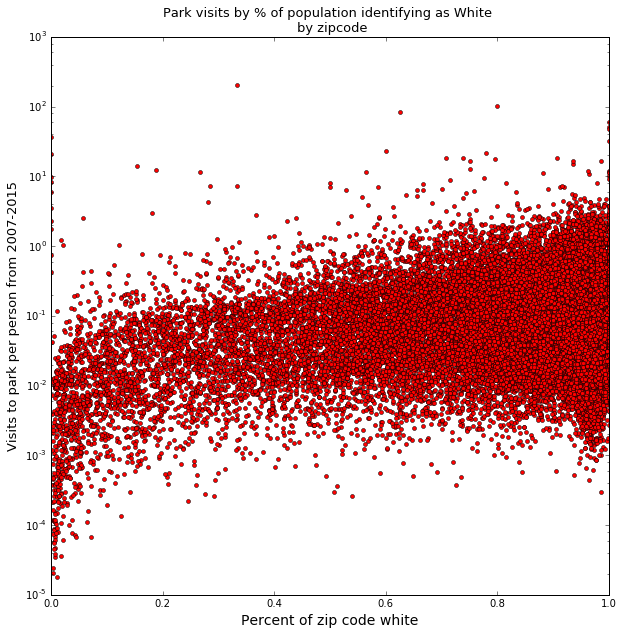

In [128]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.semilogy(aggregate_df['PopulationRaceWhite'],aggregate_df['utilization_factor_unique_visit'],'ro',markersize = 4)
plt.xlabel('Percent of zip code white',size=14)
plt.ylabel('Visits to park per person from 2007-2015', size=13)
plt.title('Park visits by % of population identifying as White \n by zipcode', size=13)

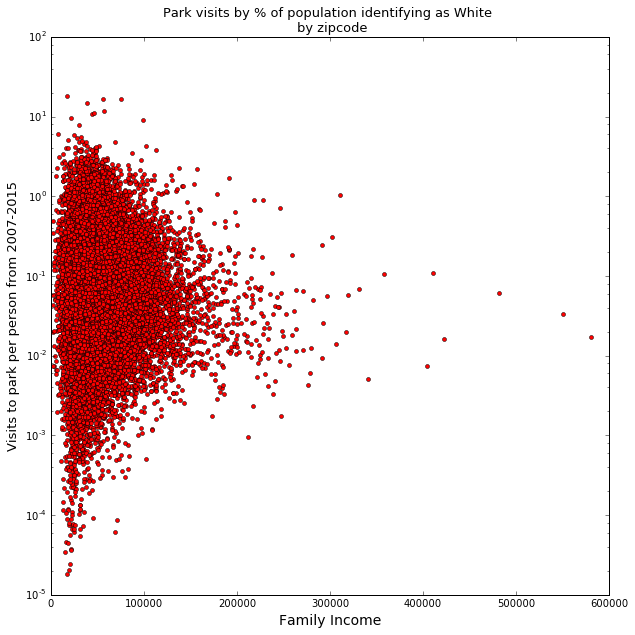

In [129]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.semilogy(aggregate_df['per_family_annual_income'],\
             aggregate_df['utilization_factor_unique_visit'],'ro',markersize = 4)
plt.xlabel('Family Income',size=14)
plt.ylabel('Visits to park per person from 2007-2015', size=13)
plt.title('Park visits by % of population identifying as White \n by zipcode', size=13)